<a href="https://colab.research.google.com/github/Atrodeon/ReconhecimentoFacial_Colab/blob/main/reconhecimento_facial_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1. INSTALAÇÕES E CORREÇÕES DE DEPENDÊNCIA ---
print("1. Instalando bibliotecas...")
!pip install tensorflow opencv-python numpy keras_vggface keras-applications > /dev/null
!wget -nc https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt > /dev/null
!wget -nc https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel > /dev/null
print("Instalação concluída.")

# --- 2. APLICAÇÃO DE PATCH (CORREÇÃO DE COMPATIBILIDADE Keras 3 / VGG-Face) ---
import inspect
import os
try:
    from keras_vggface.vggface import VGGFace

    # Localiza o arquivo problemático
    models_path = inspect.getfile(VGGFace)
    models_dir = os.path.dirname(models_path)
    target_file = os.path.join(models_dir, 'models.py')

    # Linha a ser deletada (causa o erro 'cannot import name layer_utils')
    linha_deletar = "from keras.utils import layer_utils"

    with open(target_file, 'r') as f:
        content = f.readlines()

    new_content = []
    patched = False
    for line in content:
        if line.strip() == linha_deletar:
            new_content.append('# ' + line) # Comenta a linha em vez de deletar
            patched = True
        else:
            new_content.append(line)

    if patched:
        with open(target_file, 'w') as f:
            f.writelines(new_content)
        print("Patch (correção de compatibilidade) aplicado com sucesso no VGG-Face.")

except Exception as e:
    print(f"AVISO: Falha na aplicação do patch. Pode ser necessário reiniciar. Detalhes: {e}")

# --- 3. CARREGAMENTO DOS MODELOS ---
import cv2
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input as vgg_preprocess

# Modelo de Detecção Facial (Caffe/OpenCV)
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'res10_300x300_ssd_iter_140000.caffemodel')
print("Modelo de Detecção Facial carregado.")

# Modelo de Embedding (VGG-Face/ResNet50)
facenet_model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
print("Modelo de Embedding (VGG-Face) carregado.")

# --- 4. CONFIGURAÇÃO DE ARQUIVOS (Substitua pelos nomes corretos) ---
# Você deve fazer upload desses 3 arquivos ANTES de executar as próximas células.
TEST_IMAGE = 'img25.jpg'
reference_images = {
    "Homem": "h1.jpg",
    "Mulher": "m1.jpg"
}
print(f"Configuração de arquivos: Teste='{TEST_IMAGE}', Referência={list(reference_images.keys())}")

1. Instalando bibliotecas...
--2025-12-10 13:39:29--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.002s  

2025-12-10 13:39:29 (16.7 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2025-12-10 13:39:29--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.

ImportError: cannot import name 'layer_utils' from 'keras.utils' (/usr/local/lib/python3.12/dist-packages/keras/utils/__init__.py)

In [2]:
# --- 1. INSTALAÇÕES E DOWNLOADS ---
print("1. Instalando bibliotecas...")
# Removemos keras_vggface e keras-applications
!pip install tensorflow opencv-python numpy
!wget -nc https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt > /dev/null
!wget -nc https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel > /dev/null
print("Instalação concluída.")

# --- 2. CARREGAMENTO DOS MODELOS ---
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess

# Modelo de Detecção Facial (Caffe/OpenCV)
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'res10_300x300_ssd_iter_140000.caffemodel')
print("Modelo de Detecção Facial carregado.")

# Modelo de Embedding (ResNet50 Nativo do Keras)
# Usaremos ResNet50 pré-treinado em ImageNet como feature extractor
facenet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
print("Modelo de Embedding (ResNet50 Nativo) carregado.")

# --- 3. CONFIGURAÇÃO DE ARQUIVOS (Mantenha seus nomes) ---
TEST_IMAGE = 'img25.jpg'
reference_images = {
    "Homem": "h1.jpg",
    "Mulher": "m1.jpg"
}
print(f"Configuração de arquivos: Teste='{TEST_IMAGE}', Referência={list(reference_images.keys())}")

1. Instalando bibliotecas...
File ‘deploy.prototxt’ already there; not retrieving.

File ‘res10_300x300_ssd_iter_140000.caffemodel’ already there; not retrieving.

Instalação concluída.
Modelo de Detecção Facial carregado.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Modelo de Embedding (ResNet50 Nativo) carregado.
Configuração de arquivos: Teste='img25.jpg', Referência=['Homem', 'Mulher']


In [3]:
database = {}
MIN_CONFIDENCE_DETECTION = 0.4

print("\n--- INICIANDO CRIAÇÃO DO BANCO DE DADOS (ResNet50) ---")

for name, path in reference_images.items():
    print(f"\n[INÍCIO] Processando imagem de referência para {name} (Arquivo: {path})...")

    img_ref = cv2.imread(path, cv2.IMREAD_COLOR)
    if img_ref is None:
        print(f"  -> ERRO: Imagem de referência '{path}' NÃO CARREGADA.")
        continue

    (h, w) = img_ref.shape[:2]

    # 1. Detecção da Face
    blob_ref = cv2.dnn.blobFromImage(cv2.resize(img_ref, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob_ref)
    detections_ref = net.forward()
    best_detection = detections_ref[0, 0, 0]
    confidence = best_detection[2]

    if confidence > MIN_CONFIDENCE_DETECTION:
        box = best_detection[3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # 2. Recorte e Validação
        startX, startY = max(0, startX), max(0, startY)
        endX, endY = min(w, endX), min(h, endY)
        face = img_ref[startY:endY, startX:endX]

        if face.size == 0 or face.ndim != 3 or face.shape[0] < 20 or face.shape[1] < 20:
             print(f"  -> ERRO: Recorte inválido.")
             continue

        # 3. Geração do Embedding (ResNet50 Nativo)
        try:
            # ResNet50 espera 224x224 RGB
            face_resized = cv2.resize(face, (224, 224))
            face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)

            # Pré-processamento específico para ResNet50
            pixels = np.expand_dims(face_rgb, axis=0)
            pixels = resnet_preprocess(pixels)

            embedding = facenet_model.predict(pixels, verbose=0)[0]

            database[name] = embedding
            print(f"  -> SUCESSO: Embedding de {name} armazenado. Confiança Detecção: {confidence:.2f}")

        except Exception as e:
            print(f"  -> ERRO INTERNO: Falha na extração do embedding. Detalhes: {e}")

    else:
        print(f"  -> ERRO: Nenhuma face detectada em {path} com confiança mínima ({confidence:.2f}).")


print("\n--- BANCO DE DADOS CRIADO ---")
print(f"Total de identidades: {len(database)}")


--- INICIANDO CRIAÇÃO DO BANCO DE DADOS (ResNet50) ---

[INÍCIO] Processando imagem de referência para Homem (Arquivo: h1.jpg)...
  -> SUCESSO: Embedding de Homem armazenado. Confiança Detecção: 0.93

[INÍCIO] Processando imagem de referência para Mulher (Arquivo: m1.jpg)...
  -> SUCESSO: Embedding de Mulher armazenado. Confiança Detecção: 0.84

--- BANCO DE DADOS CRIADO ---
Total de identidades: 2



--- INICIANDO RECONHECIMENTO NA IMAGEM DE TESTE ---


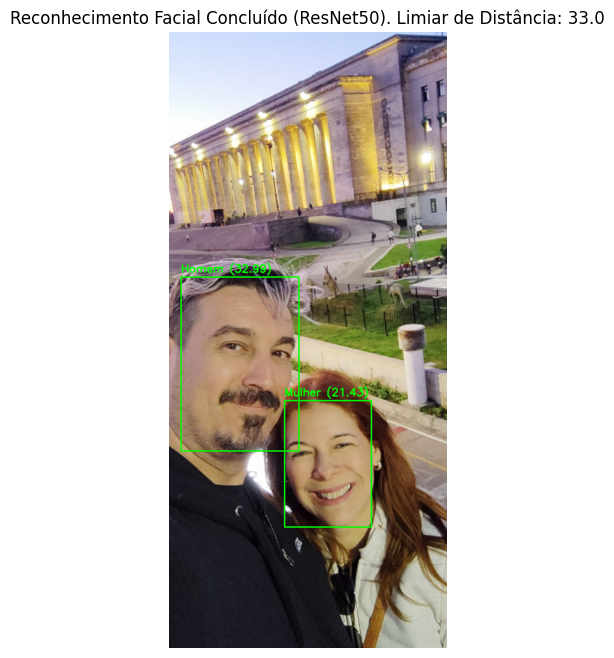


--- PROJETO FINALIZADO COM RESNET50 ---


In [6]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

# --- CONFIGURAÇÕES ---
# O ResNet50 usa distâncias diferentes do VGG-Face. Aumentamos o limiar aqui para ser mais inclusivo.
RECOGNITION_THRESHOLD = 33.0
MIN_CONFIDENCE_DETECTION = 0.5

# --- Processamento da Imagem de Teste ---
img = cv2.imread(TEST_IMAGE)
if img is None or len(database) == 0:
    print("ERRO: Imagem de teste não carregada ou banco de dados vazio.")

(h, w) = img.shape[:2]
img_output = img.copy()
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()

print("\n--- INICIANDO RECONHECIMENTO NA IMAGEM DE TESTE ---")

# Loop sobre os rostos detectados na imagem de teste
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > MIN_CONFIDENCE_DETECTION:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # 1. Recorte, Geração do Embedding
        face = img[startY:endY, startX:endX]
        if face.size == 0 or face.ndim != 3: continue

        try:
            face_resized = cv2.resize(face, (224, 224))
            face_rgb = cv2.cvtColor(face_resized, cv2.COLOR_BGR2RGB)

            pixels = np.expand_dims(face_rgb, axis=0)
            pixels = resnet_preprocess(pixels) # Pré-processamento ResNet50

            face_embedding = facenet_model.predict(pixels, verbose=0)[0]
        except:
            continue

        # 2. Comparação com o Banco de Dados
        min_dist = float('inf')
        identity = "Desconhecido"

        for name, reference_embedding in database.items():
            distance = euclidean(face_embedding, reference_embedding)

            if distance < min_dist:
                min_dist = distance
                identity = name

        # 3. Decisão Final e Desenho
        if min_dist < RECOGNITION_THRESHOLD:
            label = f"{identity} ({min_dist:.2f})"
            color = (0, 255, 0) # Verde (Reconhecido)
        else:
            label = f"Desconhecido ({min_dist:.2f})"
            color = (0, 0, 255) # Vermelho (Não Reconhecido)

        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(img_output, (startX, startY), (endX, endY), color, 2)
        cv2.putText(img_output, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

# 4. Exibir o Resultado
img_display = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_display)
plt.title(f"Reconhecimento Facial Concluído (ResNet50). Limiar de Distância: {RECOGNITION_THRESHOLD}")
plt.axis('off')
plt.show()

print("\n--- PROJETO FINALIZADO COM RESNET50 ---")